<a href="https://colab.research.google.com/github/Liang130520/Tibame-Machine-Learning/blob/main/class1025_machine_learning_regression_3_r_square_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元


In [248]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
# boston # 鳶尾花的所有資料
df = pd.DataFrame(boston["data"], columns = boston["feature_names"]) # pandas的表個型態
df["ans"] = boston["target"]
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [249]:
import numpy as np
from sklearn.model_selection import train_test_split

x = df.drop("ans", axis = 1) # 去除直欄 "ans", 產生一個新表格 x, 原 df 仍有 ans 直欄
x = np.array(x)
y = np.array(df["ans"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1) # 90% x, 10% x, 90% y, 10% y
show = x_test
print(show)
print("-----------------------")
x_train

[[3.41090e-01 0.00000e+00 7.38000e+00 0.00000e+00 4.93000e-01 6.41500e+00
  4.01000e+01 4.72110e+00 5.00000e+00 2.87000e+02 1.96000e+01 3.96900e+02
  6.12000e+00]
 [2.41030e-01 0.00000e+00 7.38000e+00 0.00000e+00 4.93000e-01 6.08300e+00
  4.37000e+01 5.41590e+00 5.00000e+00 2.87000e+02 1.96000e+01 3.96900e+02
  1.27900e+01]
 [3.52330e-01 0.00000e+00 2.18900e+01 0.00000e+00 6.24000e-01 6.45400e+00
  9.84000e+01 1.84980e+00 4.00000e+00 4.37000e+02 2.12000e+01 3.94080e+02
  1.45900e+01]
 [5.26930e-01 0.00000e+00 6.20000e+00 0.00000e+00 5.04000e-01 8.72500e+00
  8.30000e+01 2.89440e+00 8.00000e+00 3.07000e+02 1.74000e+01 3.82000e+02
  4.63000e+00]
 [4.66883e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 5.97600e+00
  8.79000e+01 2.58060e+00 2.40000e+01 6.66000e+02 2.02000e+01 1.04800e+01
  1.90100e+01]
 [1.61282e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.09600e+00
  9.69000e+01 3.75980e+00 4.00000e+00 3.07000e+02 2.10000e+01 2.48310e+02
  2.03400e+01]
 [1.02900e-01 3.00000e

array([[3.31470e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.78950e+02, 3.95000e+00],
       [8.20058e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.50000e+00, 1.69400e+01],
       [6.72400e-02, 0.00000e+00, 3.24000e+00, ..., 1.69000e+01,
        3.75210e+02, 7.34000e+00],
       ...,
       [7.72990e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.87940e+02, 1.28000e+01],
       [3.68940e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
        3.96900e+02, 3.54000e+00],
       [1.62110e-01, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
        3.96900e+02, 6.59000e+00]])

In [250]:
d = pd.DataFrame([
        [1, 2],
        [3, 4]
    ], columns = ["a", "b"], index = ["a", "b"])

d.drop("a", axis = 0) # b(3, 4) 列 a 被去除, 形成新表格
d.drop("a", axis = 1) # b(2, 4) 欄 a 被去除, 形成新表格


,b
a,2
b,4


[Text(0.5, 0.875, 'RM <= 6.941\nsquared_error = 86.128\nsamples = 455\nvalue = 22.63'),
 Text(0.25, 0.625, 'LSTAT <= 14.4\nsquared_error = 41.013\nsamples = 382\nvalue = 19.895'),
 Text(0.125, 0.375, 'DIS <= 1.385\nsquared_error = 28.028\nsamples = 221\nvalue = 23.386'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NOX <= 0.607\nsquared_error = 19.15\nsamples = 161\nvalue = 15.103'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RM <= 7.435\nsquared_error = 78.254\nsamples = 73\nvalue = 36.941'),
 Text(0.625, 0.375, 'CRIM <= 7.393\nsquared_error = 42.176\nsamples = 45\nvalue = 32.084'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NOX <= 0.683\nsquared_error = 37.405\nsamples = 28\nvalue = 44.746'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

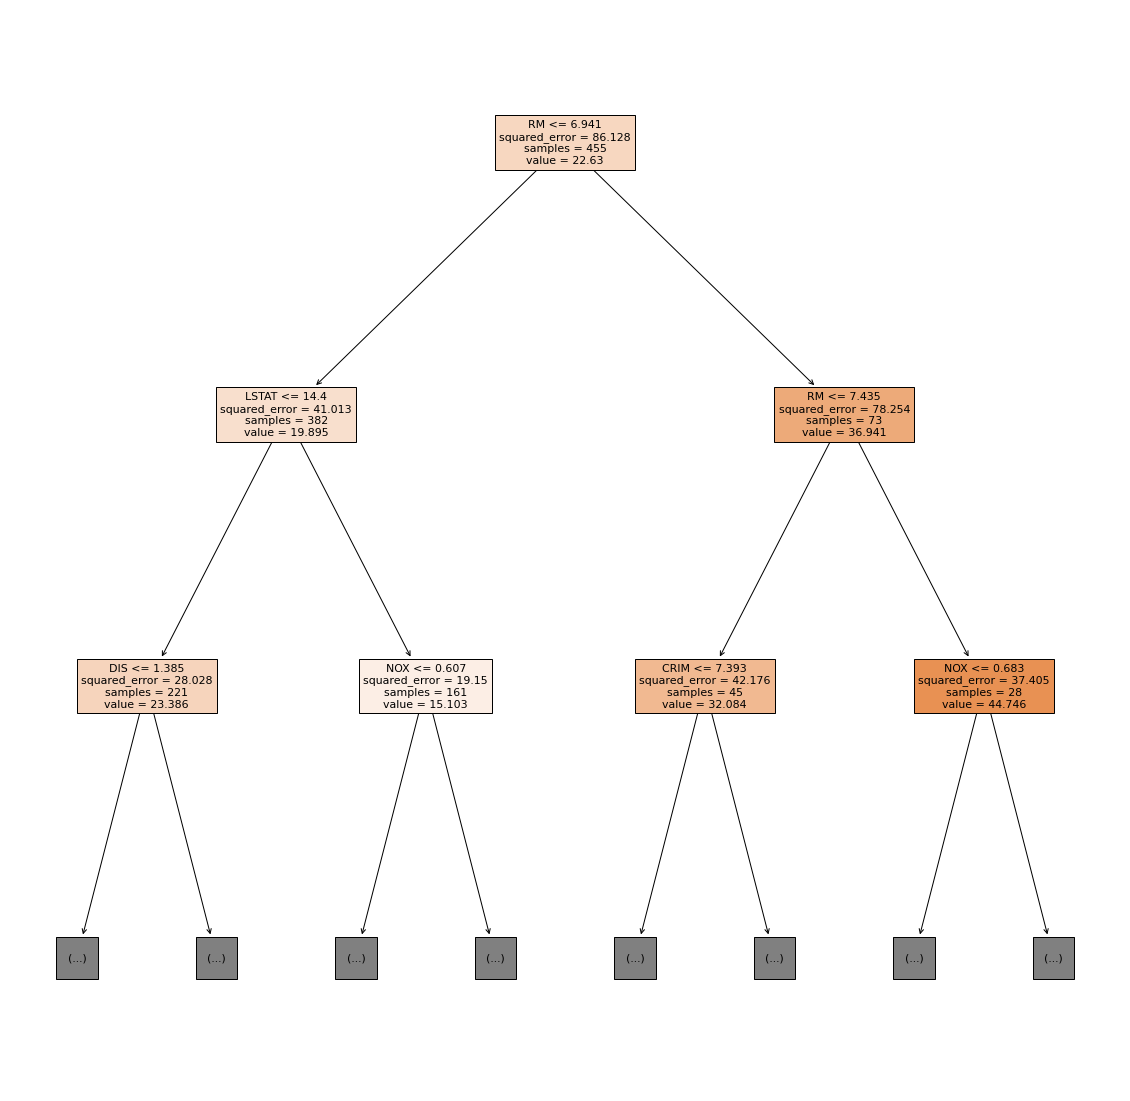

In [251]:
from sklearn.tree import DecisionTreeRegressor # 與 Classifier 不同

reg = DecisionTreeRegressor(max_depth = 5) 
reg.fit(x_train, y_train)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20)) # 圖片放大, 數值越大, 呈現越大
plot_tree(reg, 
          feature_names = boston["feature_names"], 
          filled = True,
          max_depth = 2)
# squared_error 是回歸的吉尼係數
# samples 是資料總數
# value 是資料平均值
# 如何得知圖像分布寬度或窄度：利用(每一個點與平均值的差異)總和來確認, 圖像越寬, 代表我的可信任指數越小(誤差大易猜錯)
# Mean Square Error (MSE) = [(Pi - Average)** 2 +......] * 1/n 
# RMSE = MSE ** 0.5 (跟 MAE 類似, 但易用程式理解)
# Mean Absolute Error (MAE) = [|(pre - True)| * 1/n] 絕對值計算
# 統一標準設定
# a = [(pre - True) ** 2 + ......] * 1/n
# b = [(Average - True) ** 2 + ......] * 1/n  --> 可等同於 squared_error [(True - Average) ** 2 + ......] * 1/n
# a/b 意義 if a/b == 0 -> a = 0, 完美預測, elif a/b == 1 -> a = b, 所有猜測皆同點, 即瞎猜
# a/b 意義為 瞎猜的情況下, 預測的誤差情況, 越接近0, 誤差越小. ==> 為讓人理解: 1(準確) >= 1-a/b >= 0(不準確) ==> r**2 score(r square score) 為1-a/b
# r square score 大於0.5 即為可接受範圍
# RMSE 代表意義：穩定猜測, 而不穩定猜測易造成更大差異

In [252]:
# reg.predict(x_test)
# 預測的數值是平均值, 跟value相對應

In [253]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.9137483413000752